# Data Preparation

In [1]:
# download the data
!wget https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_Input.zip


--2019-06-03 13:05:07--  https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_Input.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.72.218
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.72.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9771618190 (9.1G) [application/zip]
Saving to: ‘ISIC_2019_Training_Input.zip’

ISIC_2019_Training_ 100%[===================>]   9.10G  43.7MB/s    in 3m 34s  

2019-06-03 13:08:42 (43.5 MB/s) - ‘ISIC_2019_Training_Input.zip’ saved [9771618190/9771618190]



In [2]:
#Extract the data
#!unzip ISIC_2019_Training_Input.zip

import zipfile
import time
start = time.time()
with zipfile.ZipFile("ISIC_2019_Training_Input.zip","r") as zip_ref:
    zip_ref.extractall()

end = time.time()
elapsed = end - start
print(elapsed)  

129.57916903495789


In [0]:
#delete non images files
!rm ISIC_2019_Training_Input/ATTRIBUTION.txt
!rm ISIC_2019_Training_Input/LICENSE.txt

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


# Read in the data
ground_truth = pd.read_csv('https://s3.amazonaws.com/isic-challenge-2019/ISIC_2019_Training_GroundTruth.csv')

# Display some information in the dataset
ground_truth.head()


Using TensorFlow backend.


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Set y as the labels
y = []
for row in ground_truth.iterrows():
    innerlist = []
    newlist = row[1].index[row[1].values[1:].argmax() + 1]
    y.append(newlist)


In [0]:
print(y)

In [0]:
#add a name to the label series
yd = pd.Series(y) 
yd.name = 'cclass'

In [0]:
print(yd)

In [0]:
# Split the metadata into training and validation
df_train, df_val = train_test_split(ground_truth, test_size=0.2, random_state=101, stratify=yd)

In [0]:
# Get a list of images in each of the two folders
folder = os.listdir('ISIC_2019_Training_Input')

# Get a list of train and val images
#all_list = list(ground_truth['image'])
#
train_list = list(df_train['image'])
val_list = list(df_val['image'])

# create a work directory

In [0]:
#create a work directory
base_dir = 'base_dir'
os.mkdir(base_dir)

# Training files directory
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# Validation files directory
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


In [0]:
#create sub directory for the classes
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        dir_path = os.path.join(train_dir, col)
        os.mkdir(dir_path)
        dir_path = os.path.join(val_dir, col)
        os.mkdir(dir_path)

In [0]:
#check the directories
!ls ./base_dir/train_dir/

# Transfer the images into the folders


In [0]:
# Transfer the training images
for row in df_train.iterrows():
    image = row[1].image
    # The argmax error was occuring because the first column (image) is a string.
    # By using row[1].values[1:] we skip the first column.  This means we need 
    # add 1 to get the correct row[1].index.
    label = row[1].index[row[1].values[1:].argmax() + 1]
    fname = image + '.jpg'

    if fname in folder:
        # source path to image
        src = os.path.join('ISIC_2019_Training_Input', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        


In [0]:
# Transfer the validation images
for row in df_val.iterrows():
    image = row[1].image
    # The argmax error was occuring because the first column (image) is a string.
    # By using row[1].values[1:] we skip the first column.  This means we need 
    # add 1 to get the correct row[1].index.
    label = row[1].index[row[1].values[1:].argmax() + 1]
    fname = image + '.jpg'

    if fname in folder:
        # source path to image
        src = os.path.join('ISIC_2019_Training_Input', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        

**length of training and validation examples**

In [13]:
# validation examples
total = 0
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        npath = os.path.join(val_dir, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total)        

MEL 904
NV 2575
BCC 665
AK 173
BKL 525
DF 48
VASC 51
SCC 126
total =  5067


In [14]:
# training examples
total = 0
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        npath = os.path.join(train_dir, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total)     

MEL 3618
NV 10300
BCC 2658
AK 694
BKL 2099
DF 191
VASC 202
SCC 502
total =  20264


# Balance the training an validation data

## Balancing the val data

In [0]:
import os, random
mellen = len(os.listdir('base_dir/val_dir/MEL'))
nvlen = len(os.listdir('base_dir/val_dir/NV'))
for i in range(nvlen - mellen):
    file = random.choice(os.listdir("base_dir/val_dir/NV"))
    dst = os.path.join(val_dir,'NV', file)
    os.remove(dst)

In [16]:
# validation examples
total = 0
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        npath = os.path.join(val_dir, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total) 
val_len = total

MEL 904
NV 904
BCC 665
AK 173
BKL 525
DF 48
VASC 51
SCC 126
total =  3396


**balancing training data**

In [0]:
import os, random
mellen = len(os.listdir('base_dir/train_dir/MEL'))
nvlen = len(os.listdir('base_dir/train_dir/NV'))
for i in range(nvlen - mellen):
    file = random.choice(os.listdir("base_dir/train_dir/NV"))
    dst = os.path.join(train_dir,'NV', file)
    os.remove(dst)

In [18]:
# training examples
total = 0
for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        npath = os.path.join(train_dir, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total)
train_len = total

MEL 3618
NV 3618
BCC 2658
AK 694
BKL 2099
DF 191
VASC 202
SCC 502
total =  13582


In [0]:
# deleting UNK class because its empty
#!rm -r base_dir/val_dir/UNK
#!rm -r base_dir/train_dir/UNK

In [0]:
#!rm -r aug_dir

## Augment the training data

In [0]:
# 
# Class 'nv' is not going to be augmented
class_list = ['MEL', 'BKL', 'BCC', 'SCC', 'VASC', 'DF', 'AK']

for item in class_list:

    # Create a temporary directory for the augmented images
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)

    # Create a directory within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # List all the images in the directory
    img_list = os.listdir('base_dir/train_dir2/' + img_class)

    # Copy images from the class train dir to the img_dir
    for fname in img_list:
        # source path to image
        src = os.path.join('base_dir/train_dir2/' + img_class, fname)
        # destination path to image
        dst = os.path.join(img_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir2/' + img_class

    # Create a data generator to augment the images in real time
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        # brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size)

    # Generate the augmented images and add them to the training folders
    num_aug_images_wanted = 6000  # total number of images we want to have in each class
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted - num_files) / batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0, num_batches):
        imgs, labels = next(aug_datagen)

    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

In [0]:
# training examples
total = 0
train_fld = os.listdir (train_dir2)
for col in train_fld:
        npath = os.path.join(train_dir2, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total)

**Visualize 50 augmented images**

In [0]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio as im
from keras.preprocessing import image

In [0]:
# plots images with labels within jupyter notebook
# source: https://github.com/smileservices/keras_utils/blob/master/utils.py

def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles=None) # titles=labels will display the image labels

In [0]:
# End of Data Preparation
### ===================================================================================== ###
# Start of Model Building

# Building the model

In [0]:
# Import the libraries
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

from keras import layers
from keras import Model
from keras.models import Sequential
from keras.layers import Activation


from keras.metrics import categorical_crossentropy

from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *


%matplotlib inline


## summary on the full model

In [0]:
from keras.applications.mobilenet import MobileNet, preprocess_input
mobilenet_model = MobileNet(input_shape=(224, 224, 3), include_top=True, weights="imagenet")

In [0]:
type(mobilenet_model)

In [0]:
mobilenet_model.summary()

## editing the model

In [67]:
from keras.applications.mobilenet import MobileNet, preprocess_input
mobilenet_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
mobilenet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [0]:
# The paths for the training and validation images
train_path = 'base_dir/train_dir'
val_path = 'base_dir/val_dir'

In [0]:
# Declare a few useful values
num_train_samples = train_len
num_val_samples = val_len
train_batch_size = 50
val_batch_size = 50
image_height = 224
image_width = 224

In [0]:
# Declare how many steps are needed in an iteration
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


In [71]:
# Set up generators

datagenr = ImageDataGenerator(
    preprocessing_function= \
    keras.applications.mobilenet.preprocess_input)


train_batches = datagenr.flow_from_directory(
    train_path,
    target_size=(image_height, image_width),
    batch_size=train_batch_size)

val_batches = datagenr.flow_from_directory(
    val_path,
    target_size=(image_height, image_width),
    batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagenr.flow_from_directory(
    val_path,
    target_size=(image_height, image_width),
    batch_size=val_batch_size,
    shuffle=False)

Found 13582 images belonging to 8 classes.
Found 3396 images belonging to 8 classes.
Found 3396 images belonging to 8 classes.


In [72]:
#get the last layer shape
last_layer = mobilenet_model.get_layer('conv_pw_13_relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 1024)


In [0]:

# Flatten the output layer to 1 dimension
#x = layers.GlobalAveragePooling2D()(last_output)
x = layers.GlobalAveragePooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(8, activation='softmax')(x)
# Configure and compile the model
model = Model(mobilenet_model.input, x)

In [0]:
# Freeze the weights of the layers that we aren't training (training the last 23)
for layer in model.layers[:-23]:
    layer.trainable = False

In [0]:

optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy'])

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [0]:
!rm -r models

# Compiling the model

In [0]:
os.mkdir('models')
import time
start = time.time()

In [61]:
# Declare the filepath for the saved model

#filepath="models/model-{epoch:02d}-{categorical_accuracy:.2f}-{val_categorical_accuracy:.2f}.h5"
filepath="models/mobile-{epoch:02d}-{val_categorical_accuracy:.2f}.h5"


# Declare a checkpoint to save the best version of the model
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1,
                             save_best_only=True, mode='max')

# Reduce the learning rate as the learning stagnates
reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

callbacks_list = [checkpoint, reduce_lr]

# Fit the model
history = model.fit_generator(train_batches,
                              steps_per_epoch=train_steps,
                             # class_weight=class_weights,
                              validation_data=val_batches,
                              validation_steps=val_steps,
                              epochs=30,
                              verbose=1,
                              callbacks=callbacks_list)



Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/30
46/46 [==============================] - 298s 6s/step - loss: 6.7007 - categorical_accuracy: 0.3328 - val_loss: 6.1128 - val_categorical_accuracy: 0.3595

Epoch 00001: val_categorical_accuracy improved from -inf to 0.35954, saving model to models/mobile-01-0.36.h5
Epoch 2/30
46/46 [==============================] - 279s 6s/step - loss: 5.0063 - categorical_accuracy: 0.4575 - val_loss: 4.0679 - val_categorical_accuracy: 0.4455

Epoch 00002: val_categorical_accuracy improved from 0.35954 to 0.44552, saving model to models/mobile-02-0.45.h5
Epoch 3/30
46/46 [==============================] - 291s 6s/step - loss: 4.4269 - categorical_accuracy: 0.4949 - val_loss: 4.1935 - val_categorical_accuracy: 0.4608

Epoch 00003: val_categorical_accuracy improved from 0.44552 to 0.46084, saving model to models/mobile-03-0.46.h5
Epoch 4/30
46/46 [==============================] - 291s 6s/step - loss: 4.0408 - catego

In [62]:
end = time.time()
elapsed = end - start
print(elapsed)

8605.49369931221


# Model testing and evaluating

In [63]:
val_loss, val_cat_acc = \
model.evaluate_generator(val_batches, steps=val_steps)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)


val_loss: 3.688773450918838
val_cat_acc: 0.5058892847371186


In [0]:
# Evaluation of the best epoch
model.load_weights('models/mobile-10-0.61.h5')


#val_loss, val_cat_acc = \
model.evaluate_generator(val_batches, steps=val_steps)

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)



In [64]:
# Create a confusion matrix of the test images
test_labels = val_batches.classes
# Make predictions
predictions = model.predict_generator(val_batches, steps=val_steps, verbose=1)


12/12 [==============================] - 58s 5s/step


**Training and validation loss per epoch curve**

Text(0.5, 1.0, 'Training and validation loss')

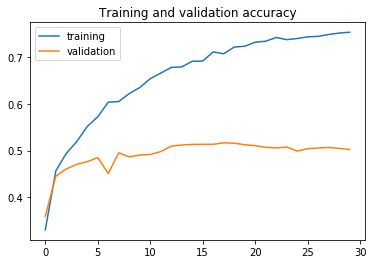

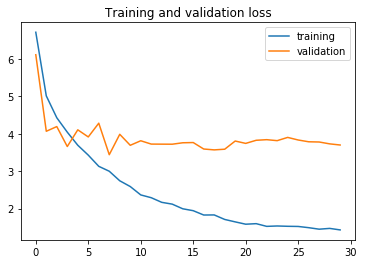

In [65]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

**Confusion matrix**

Confusion matrix, without normalization
[[  2  44   1   1  43  82   0   0]
 [  9 171   3   0 175 306   0   1]
 [ 13 132   2   1 139 238   0   0]
 [  1  11   0   0   9  27   0   0]
 [ 22 225   6   1 231 419   0   0]
 [ 15 231   7   2 228 419   1   1]
 [  0  37   2   0  35  52   0   0]
 [  0  15   0   0  13  22   0   1]]


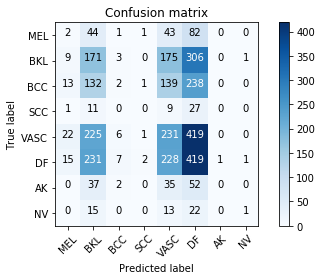

In [66]:
# Declare a function for plotting the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

cm_plot_labels = ['MEL', 'BKL', 'BCC', 'SCC', 'VASC', 'DF', 'AK', 'NV']

plot_confusion_matrix(cm, cm_plot_labels)

# Upload the model to drive

In [0]:
!cp 'models/model-30-1.00-0.97.h5' -d 'Densenet-model-0.97.h5'


In [0]:
modelname = 'Densenet-model-0.97.h5'
modelweight = 'Densenet-model-0.97_weightbest.h5'

In [0]:
from keras.models import load_model
from keras.models import Model


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 2. Save Keras Model or weights on google drive




# create on Colab directory
model.save(modelname)    
model_file = drive.CreateFile({'title' : modelname})
model_file.SetContentFile(modelname)
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})


In [0]:
model.save_weights(modelweight)
weights_file = drive.CreateFile({'title' : modelweight})
weights_file.SetContentFile(modelweight)
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!cp '/drive/My\ Drive/densenet89.h5' -d ./

In [0]:
!mv 'Densenet-model-0.97.h5' 'content/drive/My Drive/densenetmodels/Densenet-model-0.97.h5'

In [0]:
os.mkdir('drive/My Drive/densenetmodels')

# Experiments

In [0]:
import cv2
from PIL import Image


In [0]:
# Training file directory
train_dir2 = os.path.join(base_dir, 'train_dir2')
os.mkdir(train_dir2)

for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        dir_path = os.path.join(train_dir2, col)
        os.mkdir(dir_path)

In [0]:
#resizing all images in train dir
width = 448
train_fld = os.listdir (train_dir)
for subfld in train_fld:
    class_dir = os.path.join(train_dir,subfld)
    dst_class_dir = os.path.join(train_dir2,subfld)
    temp_img = os.listdir (class_dir)    
    if '.ipynb_checkpoints' in temp_img:
        temp_img.remove('.ipynb_checkpoints')
        !rm -r temp_img +'.ipynb_checkpoints' 
    for nb in range((int(len(temp_img)))):
        im=cv2.imread(class_dir + '/' + temp_img[nb])
        img=cv2.resize(im,(width,width)) 
        iname =os.path.join(dst_class_dir,str(nb) +'.jpg')
        cv2.imwrite(iname, img)

In [0]:
# training examples
total = 0
train_fld = os.listdir (train_dir)
for col in train_fld:
        npath = os.path.join(train_dir, col)
        print(col,len(os.listdir(npath)))
        total = total+len(os.listdir(npath))
print('total = ',total)

In [0]:
!rm -r base_dir/train_dir2

In [0]:
# Training file directory
train_dir3 = os.path.join(base_dir, 'train_dir3')
os.mkdir(train_dir3)

for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK' or  col == 'NV' ):
        dir_path = os.path.join(train_dir3, col)
        os.mkdir(dir_path)

In [0]:
# Training file directory
train_dir4 = os.path.join(base_dir, 'train_dir4')
os.mkdir(train_dir4)

for col in ground_truth.columns:
    if not (col == 'image' or  col == 'UNK'):
        dir_path = os.path.join(train_dir4, col)
        os.mkdir(dir_path)

In [0]:

# combain 4 images to one with the same size

def concat_tile(im_list_2d):
    return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])
  
train_fld = os.listdir (train_dir2)
for subfld in train_fld:
  if not (subfld == 'NV'):
    class_dir = os.path.join(train_dir2,subfld)
    dst_class_dir = os.path.join(train_dir2,subfld)
    temp_img = os.listdir (class_dir)
    if '.ipynb_checkpoints' in temp_img:
        temp_img.remove('.ipynb_checkpoints')
    mod = len(train_images) % 4
    for dl in range(mod):
        del train_images[0]
    for nb in range((int(len(temp_img)/4))):
        im1 = cv2.imread(class_dir +'/'+ temp_img[0])
        im2 = cv2.imread(class_dir +'/'+ temp_img[1])
        im3 = cv2.imread(class_dir +'/'+ temp_img[2])
        im4 = cv2.imread(class_dir +'/'+ temp_img[3])
        im1_s = cv2.resize(im1, dsize=(0, 0), fx=0.5, fy=0.5)
        im2_s = cv2.resize(im2, dsize=(0, 0), fx=0.5, fy=0.5)
        im3_s = cv2.resize(im3, dsize=(0, 0), fx=0.5, fy=0.5)
        im4_s = cv2.resize(im4, dsize=(0, 0), fx=0.5, fy=0.5)
        im_tile = concat_tile([[im1_s, im2_s],[im3_s, im4_s]])
        iname =os.path.join(dst_class_dir,str(nb) +'.jpg') 
        cv2.imwrite(iname, im_tile)
        del temp_img[:4]
        

In [0]:
!pip install image_slicer
import image_slicer
image_slicer.slice('ISIC_0056038.jpg', 4)

In [0]:
# slicing one image to 4 blocks the result is 5 images
import image_slicer

train_fld = os.listdir (train_dir2)
for subfld in train_fld:
  if not (subfld == 'NV'):
    class_dir = os.path.join(train_dir2,subfld)
    dst_class_dir = os.path.join(train_dir2,subfld)
    temp_img = os.listdir (class_dir)
    if '.ipynb_checkpoints' in temp_img:
        temp_img.remove('.ipynb_checkpoints')
    for nb in range((int(len(temp_img)))):
        image_slicer.slice(class_dir +'/'+ temp_img[nb], 4)
        
        im=cv2.imread(class_dir + '/' + temp_img[nb])
        img=cv2.resize(im,(224,224)) 
        iname =os.path.join(dst_class_dir , temp_img[nb])
        cv2.imwrite(iname, img)
        

In [0]:
import os, random
train_fld = os.listdir (train_dir2)
for subfld in train_fld:
    class_dir = os.path.join(train_dir2,subfld)
    
    temp_img = os.listdir (class_dir)
    for nb in range((int(len(temp_img)))):
        file = random.choice(temp_img)
        src = os.path.join(class_dir, file)
        
        os.rename(src, class_dir +  str(nb) + '_new.jpg')
        temp_img.remove(str(file))      